In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
# checking NA
# there are no missing values in the dataset
df.isnull().values.any()

False

In [5]:
order=list(np.sort(df['label'].unique()))
order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

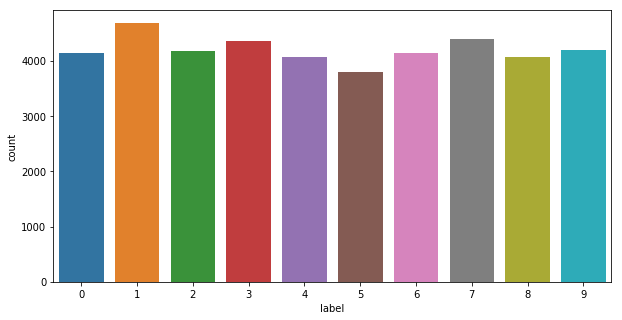

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'label', data = df)

#### There is no much variation in the labels. All are almost equally distributed

### Data Preparation

In [7]:
# train test split with train_size=20% and test size=80%
df_train, df_test= train_test_split(df,train_size=0.2, random_state=101)
print(df_train.shape)
print(df_test.shape)

(8400, 785)
(33600, 785)


In [8]:
# Identify the numeric columns
numeric_cols= df.select_dtypes(include=['float64','int64'])
varlist=list(numeric_cols.columns)

In [9]:
# Rescaling the features
scaler= StandardScaler()

df_train[varlist]= scaler.fit_transform(df_train[varlist])
df_train.describe()

C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8.400000e+03,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,...,8.400000e+03,8.400000e+03,8.400000e+03,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0,8400.0
mean,7.577272e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.076904e-16,-5.669324e-16,3.018287e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.000060e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000060e+00,1.000060e+00,1.000060e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.540720e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.599326e-02,-2.584220e-02,-1.680471e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-8.484838e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.599326e-02,-2.584220e-02,-1.680471e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-1.562476e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.599326e-02,-2.584220e-02,-1.680471e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8.821067e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.599326e-02,-2.584220e-02,-1.680471e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.574343e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.909080e+01,4.838235e+01,6.992712e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Split df_train into X_train and y_train
y_train= df_train.label.values.astype(int)
X_train= df_train.drop('label', axis=1)

In [11]:
# Test Data
df_test[varlist]= scaler.transform(df_test[varlist])

# Split into X_test and y_test
y_test= df_test.label.values.astype(int)
X_test= df_test.drop('label',axis=1)

C:\Users\thejasvini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## Model Building- Linear and Non-linear models

### Linear Model

In [12]:
model_linear= SVC(kernel='linear')

model_linear.fit(X_train, y_train)

y_test_pred= model_linear.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Accuracy 0.8576190476190476


array([[ 6371,   554,   120],
       [ 1092, 17529,  1307],
       [  292,  1419,  4916]], dtype=int64)

### Non Linear Model

In [13]:
non_linear_model= SVC(kernel='rbf')

non_linear_model.fit(X_train, y_train)

y_test_pred= non_linear_model.predict(X_test)

In [14]:
print("Accuracy", metrics.accuracy_score(y_test,y_test_pred))
metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred)

Accuracy 0.9480952380952381


array([[ 6762,   261,    22],
       [   83, 19472,   373],
       [   60,   945,  5622]], dtype=int64)

#### Let us proceed with non linear model since the accuracy is higher

### Hyperparameter Tuning- GridSearchCV

In [15]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 77.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [16]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,81.231243,2.000225,11.772473,0.305987,1,0.01,"{'C': 1, 'gamma': 0.01}",0.865476,0.869048,0.866071,...,0.867500,0.006193,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,24.633128,0.540691,5.690925,0.182674,1,0.001,"{'C': 1, 'gamma': 0.001}",0.937500,0.939881,0.938095,...,0.933452,0.006360,5,0.959077,0.961607,0.960565,0.961458,0.962798,0.961101,0.001236
2,35.458770,1.771308,7.947854,0.089813,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.860714,0.883333,0.878571,...,0.869881,0.011114,11,0.879315,0.873363,0.877976,0.879315,0.878274,0.877649,0.002210
3,83.913926,0.965202,11.692379,0.315579,10,0.01,"{'C': 10, 'gamma': 0.01}",0.873810,0.875000,0.874405,...,0.875833,0.006645,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,19.608891,0.208996,4.440603,0.109622,10,0.001,"{'C': 10, 'gamma': 0.001}",0.952381,0.958333,0.959524,...,0.954405,0.003795,1,0.997321,0.997173,0.997321,0.997470,0.997619,0.997381,0.000152


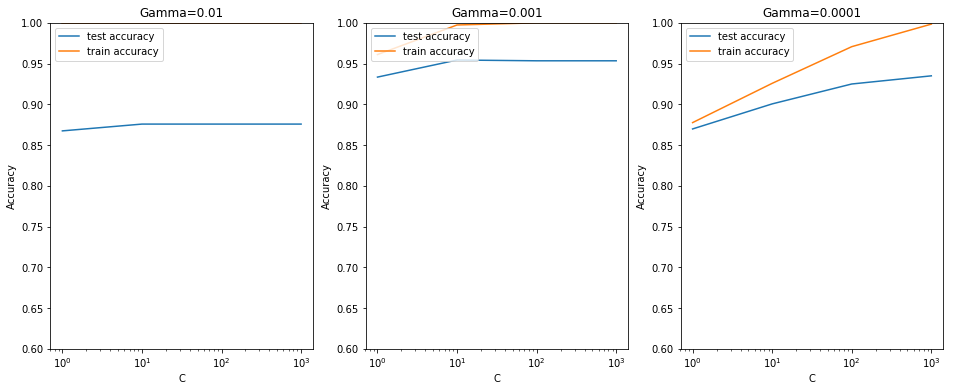

In [17]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [18]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9544047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [20]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9620238095238095 

[[ 6855   172    18]
 [   86 19489   353]
 [   41   606  5980]] 



### Conclusion¶
The accuracy achieved using a non-linear kernel (~0.96) is mush higher than that of a linear one (~0.85). We can conclude that the problem is highly non-linear in nature. 